# Visualise Combined output from RQTL across multiple regions

### general imports

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sc
import copy

### some functions

In [26]:


chr_ranks_file="/home/tilman/nas/stripes_AIL_gg6a/F2/stripes_data/input_aux/Index_fastq_contig_chr.txt"
name_dict = {line.split("\t")[2]:line.split("\t")[0] for line in open(chr_ranks_file).read().split("\n") if not line=="" }

a = """Chromosome 1	CM000093.5	=	NC_006088.5	7
Chromosome 2	CM000094.5	=	NC_006089.5	0
Chromosome 3	CM000095.5	=	NC_006090.5	4
Chromosome 4	CM000096.5	=	NC_006091.5	0
Chromosome 5	CM000097.5	=	NC_006092.5	0
Chromosome 6	CM000098.5	=	NC_006093.5	6
Chromosome 7	CM000099.5	=	NC_006094.5	0
Chromosome 8	CM000100.5	=	NC_006095.5	0
Chromosome 9	CM000101.5	=	NC_006096.5	1
Chromosome 10	CM000102.5	=	NC_006097.5	0
Chromosome 11	CM000103.5	=	NC_006098.5	0
Chromosome 12	CM000104.5	=	NC_006099.5	0
Chromosome 13	CM000105.5	=	NC_006100.5	1
Chromosome 14	CM000106.5	=	NC_006101.5	1
Chromosome 15	CM000107.5	=	NC_006102.5	1
Chromosome 16	CM000108.5	=	NC_006103.5	1
Chromosome 17	CM000109.5	=	NC_006104.5	0
Chromosome 18	CM000110.5	=	NC_006105.5	0
Chromosome 19	CM000111.5	=	NC_006106.5	1
Chromosome 20	CM000112.5	=	NC_006107.5	0
Chromosome 21	CM000113.5	=	NC_006108.5	0
Chromosome 22	CM000114.5	=	NC_006109.5	1
Chromosome 23	CM000115.5	=	NC_006110.5	6
Chromosome 24	CM000116.5	=	NC_006111.5	0
Chromosome 25	CM000124.5	=	NC_006112.4	1
Chromosome 26	CM000117.5	=	NC_006113.5	0
Chromosome 27	CM000118.5	=	NC_006114.5	0
Chromosome 28	CM000119.5	=	NC_006115.5	1
Chromosome 30	CM003637.2	=	NC_028739.2	0
Chromosome 31	CM003638.2	=	NC_028740.2	3
Chromosome 32	CM000120.4	=	NC_006119.4	0
Chromosome 33	CM000123.5	=	NC_008465.4	1
Chromosome W	CM000121.5	=	NC_006126.5	52
Chromosome Z	CM000122.5	=	NC_006127.5	1
"""

a = a.split("\n")
a = [i.split("\t") for i in a if not i==""]
name2dict = {i[3]:i[0] for i in a}

rev_name_dict = {line.split("\t")[0]:line.split("\t")[2] for line in open(chr_ranks_file).read().split("\n") if not line=="" }


def make_all_plots_simple(df,filename):
    num_plots = len(set(df.chr))
    fig, axes = plt.subplots(ncols=1, nrows=num_plots, figsize=(20,2*num_plots))
    for i,k in enumerate(list(set(df.chr))):
        curr_df = df[df.chr==k]
        axes[i].plot(curr_df["pos"], curr_df["lod"], color="black")
        axes[i].set_xlim(0,max(curr_df["pos"]))
        axes[i].set_ylim(0,5)
        axes[i].axhline(3, color='red', lw=2)
        axes[i].set_xlabel("chromosome {}".format(k))
    plt.tight_layout()
    plt.savefig(filename)
    plt.show()


def make_all_plots(df,filename,name2dict=name2dict, name_dict=name_dict, lod_thresh=None):
    if lod_thresh:
        num_plots = 0
        for i,k in enumerate(list(set(df.chr))):
            curr_df = df[df.chr==k]
            if np.max(curr_df.lod)>=lod_thresh:
                num_plots+=1
        fig, axes = plt.subplots(ncols=1, nrows=num_plots, figsize=(20,2*num_plots), sharey=True)
        curr_plot = 0
        #print(curr_plot)
        for i,k in enumerate(list(set(df.chr))):
            curr_df = df[df.chr==k]
            if np.max(curr_df.lod)>=lod_thresh:
                #print("plotting chr {} on axis {}".format(k,curr_plot) )
                axes[curr_plot].plot(curr_df["pos"], curr_df["lod"], color="black")
                axes[curr_plot].set_xlim(0,max(curr_df["pos"]))
                #axes[curr_plot].set_ylim(0,5)
                axes[curr_plot].axhline(lod_thresh, color='red', lw=2)
                axes[curr_plot].set_xlabel("NAME: {name}\n  NAME: {name2}\nRANK : {rank}                    ".format(name=name_dict[str(k)],rank=k, name2=name2dict[name_dict[str(k)]]))
                axes[curr_plot].set_ylabel("lod")

                curr_plot+=1
    else:
        num_plots = len(set(df.chr))
        fig, axes = plt.subplots(ncols=1, nrows=num_plots, figsize=(20,2*num_plots), sharey=True)
        for i,k in enumerate(list(set(df.chr))):
            curr_df = df[df.chr==k]
            axes[i].plot(curr_df["pos"], curr_df["lod"], color="black")
            axes[i].set_xlim(0,max(curr_df["pos"]))
            #axes[i].set_ylim(0,5)
            axes[i].set_xlabel("NAME: {name}\n  NAME: {name2}\n RANK : {rank}                  ".format(name=name_dict[str(k)],rank=k, name2=name2dict[name_dict[str(k)]]))
            axes[i].set_ylabel("lod")


    plt.tight_layout()
    plt.savefig(filename)
    plt.show()


def read_qtl_out(f):
    df = pd.read_csv(f)
    df.columns = ["marker", "chr", "pos", "lod"]
    return df


def make_all_plots_F2_F3(df,df2, filename,name2dict=name2dict, name_dict=name_dict, lod_thresh=None):
    if lod_thresh:
        num_plots = 0
        for i,k in enumerate(list(set(df.chr))):
            curr_df = df[df.chr==k]
            curr_df2 = df2[df2.chr==k]
            if np.max(curr_df.lod)>=lod_thresh or np.max(curr_df2.lod)>=lod_thresh:

                num_plots+=1

        print(num_plots)
        fig, axes = plt.subplots(ncols=1, nrows=num_plots, figsize=(20,10*num_plots), sharey=True)
        curr_plot = 0
        #print(curr_plot)
        for i,k in enumerate(list(set(df.chr))):
            curr_df = df[df.chr==k]
            curr_df2 = df2[df2.chr==k]
            if np.max(curr_df.lod)>=lod_thresh or np.max(curr_df2.lod)>=lod_thresh:
                #print("plotting chr {} on axis {}".format(k,curr_plot) )
                axes[curr_plot].plot(curr_df["pos"], curr_df["lod"], color="black", label="F2")
                axes[curr_plot].plot(curr_df2["pos"], curr_df2["lod"], color="blue", label="F3")
                axes[curr_plot].set_xlim(-1,max(curr_df["pos"])+1)
                axes[curr_plot].set_ylim(0,6)
                axes[curr_plot].axhline(lod_thresh, color='red', lw=2)
                axes[curr_plot].set_xlabel("NAME: {name}\n  NAME: {name2}\nRANK : {rank}                    ".format(name=name_dict[str(k)],rank=k, name2=name2dict[name_dict[str(k)]]))
                axes[curr_plot].set_ylabel("lod")
                axes[curr_plot].legend()
                curr_plot+=1
    else:
        num_plots = len(set(df.chr))
        fig, axes = plt.subplots(ncols=1, nrows=num_plots, figsize=(20,5*num_plots), sharey=True)
        for i,k in enumerate(list(set(df.chr))):
            curr_df = df[df.chr==k]
            axes[i].plot(curr_df["pos"], curr_df["lod"], color="black")
            axes[i].set_xlim(0,max(curr_df["pos"]))
            axes[i].set_ylim(0,5)
            axes[i].set_xlabel("NAME: {name}\n  NAME: {name2}\n RANK : {rank}                  ".format(name=name_dict[str(k)],rank=k, name2=name2dict[name_dict[str(k)]]))
            axes[i].set_ylabel("lod")
            axes[i].legend()

    plt.tight_layout()
    plt.savefig(filename)
    plt.show()


### load data

In [58]:
F2 = read_qtl_out("20190828_out_f2_bw8_ctrlsex.csv")
F3 = read_qtl_out("20190828_out_f3_bw8_ctrlsex.csv")
F8 = read_qtl_out("20190828_out_f8_bw8_ctrlsex.csv")
F15 = read_qtl_out("20190828_out_f15_bw8_ctrlsex.csv")
Fall = read_qtl_out("20190828_out_all_normbw8_ctrlsex.csv")


In [59]:
F2F3 = F2.merge( F3, how="outer", suffixes=("_F2", "_F3"), on=("marker", "chr","pos"))
F2F3F8 = F2F3.merge( F8, how="outer", suffixes=("", "_F8"), on=("marker", "chr","pos"))
F2F3F8F15 = F2F3F8.merge( F15, how="outer", suffixes=("", "_F15"), on=("marker", "chr","pos"))
Fall_all = F2F3F8F15.merge( Fall, how="outer", suffixes=("", "_Fall"), on=("marker", "chr","pos"))

## Plots

In [65]:
Fall_all

,marker,chr,pos,lod_F2,lod_F3,lod,lod_F15,lod_Fall
0,1-1,1,0,0.316597,0.210814,2.330908,0.783447,0.652418
1,1-2,1,5,0.262383,0.255585,0.912369,0.884461,0.056221
2,1-3,1,10,0.243855,0.672178,0.861899,0.278726,0.107816
3,1-4,1,15,0.233517,0.462884,0.828276,0.041847,0.120484
4,1-5,1,20,0.331015,0.220196,0.481621,0.030921,0.087994
5,1-6,1,25,0.318371,0.404112,0.474638,0.052315,0.086255
6,1-7,1,30,0.300700,0.495744,0.466217,0.075859,0.085181
7,1-8,1,35,0.088319,0.410369,0.456629,0.099991,0.015337
8,1-9,1,40,0.062364,0.334305,0.447558,0.123855,0.033009
9,1-10,1,45,0.046122,0.245666,0.442315,NaN,0.015573


In [141]:
Fall_all.columns = ['marker', 'chr', 'pos', 'lod_F2', 'lod_F3', 'lod_F8', 'lod_F15',
       'lod_Fall']

In [12]:
#### "all" - plots

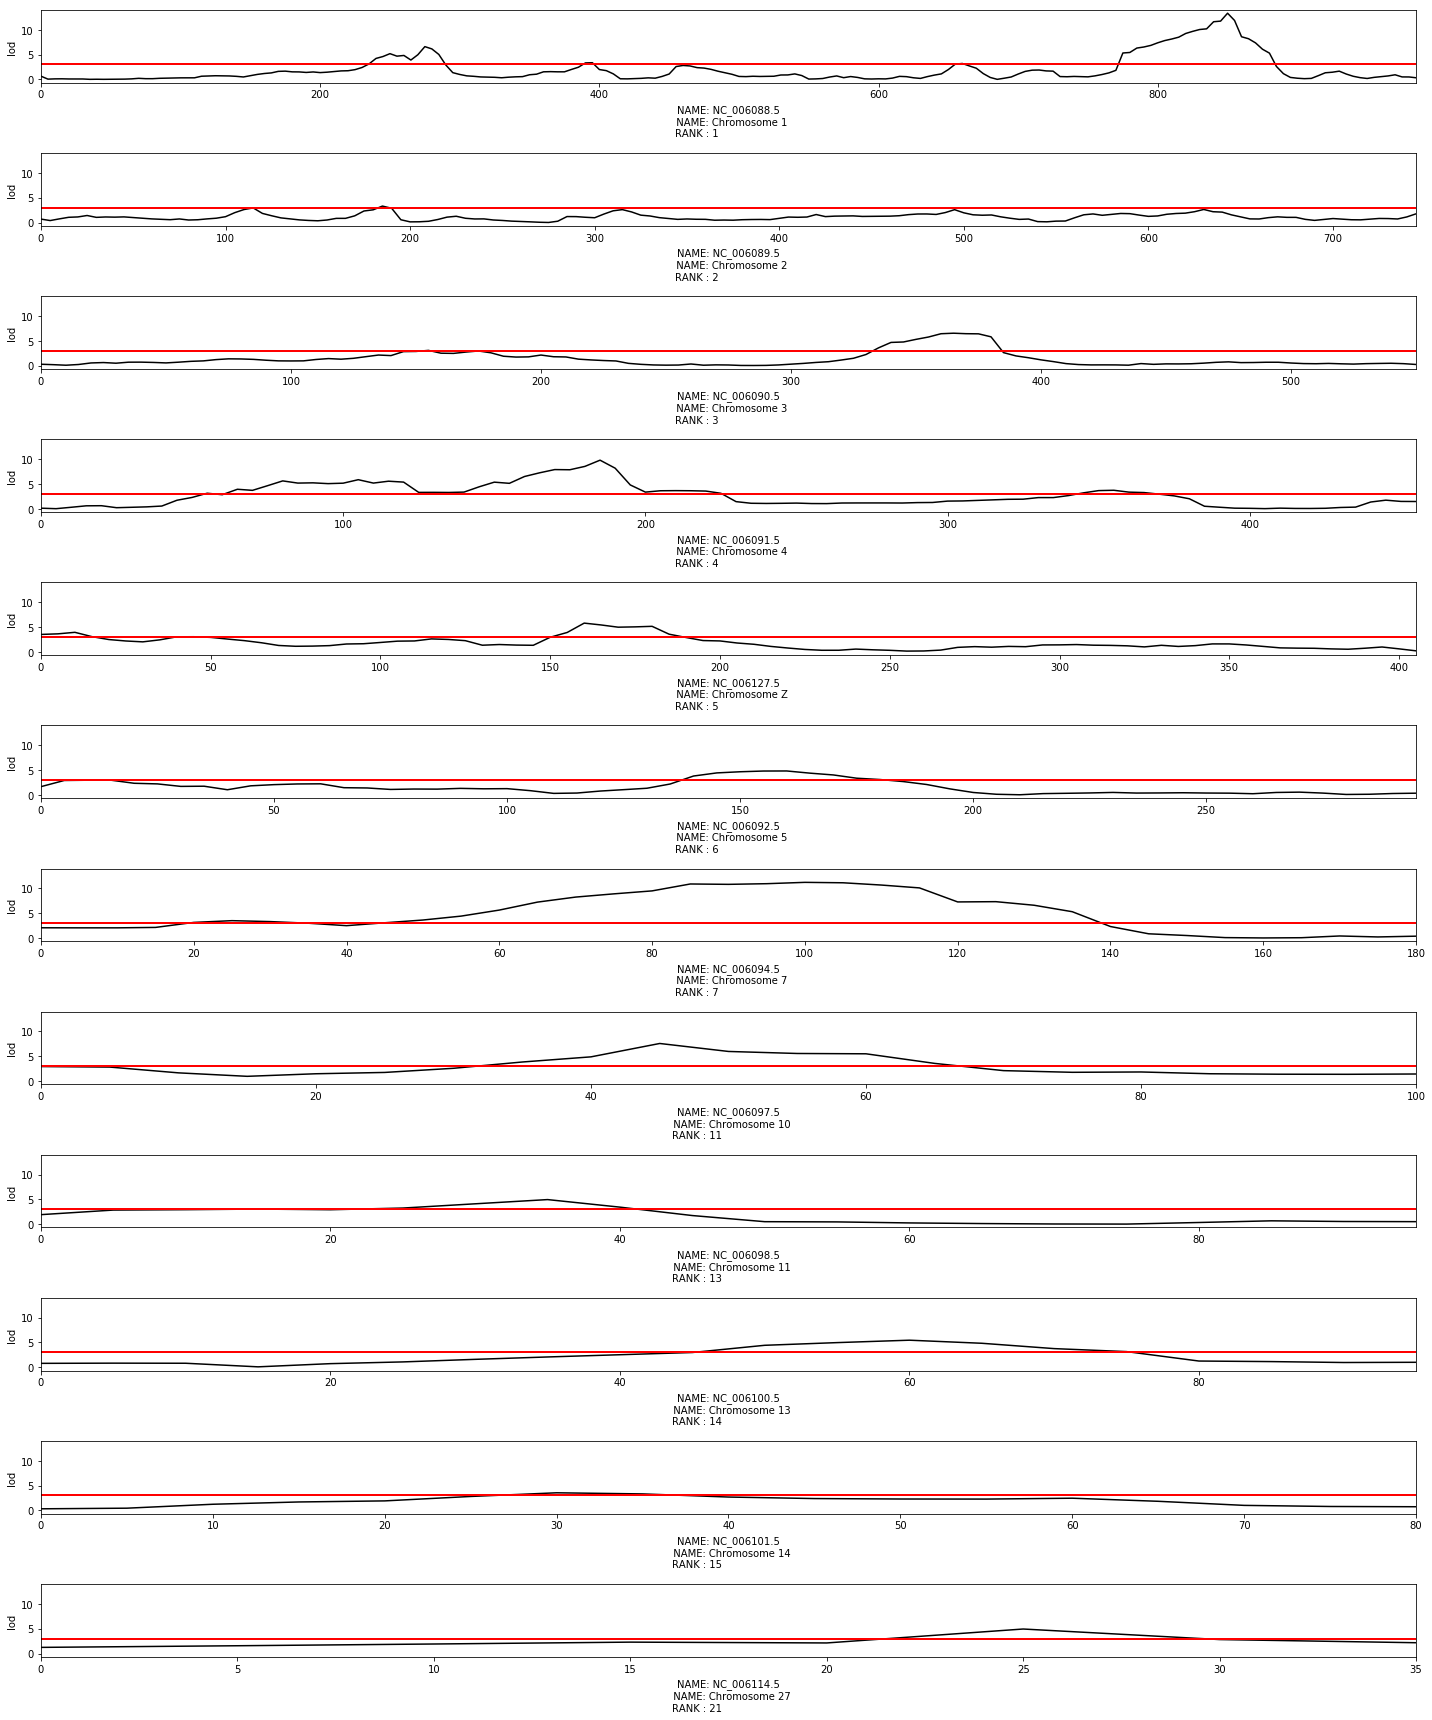

In [27]:
make_all_plots(df=Fall, filename="./plots_rqtl_out/20190828_combined_norm_qtl_ctrlsex.png", lod_thresh=3)

### overlay all

In [158]:
name_dict["8"]

'NC_006093.5'

In [159]:
name2dict["NC_006093.5"]

'Chromosome 6'

In [142]:
tot = copy.deepcopy(Fall_all)

In [143]:
tot.chr = tot.chr.astype(str)

In [375]:
def big_plot(input_df,chrom=None,lod_thresh=3, scatter=True, interval=None , pos=None):
    if chrom:
        fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,10))
        df = input_df.loc[input_df["chr"]==str(chrom)]
        if interval:
            df = df.loc[[i for i in df.index if interval[0]<i<interval[1]]]
        ax.set_xlabel(name2dict[name_dict[str(chrom)]], size=30)
    else:
        fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(40,5))
        df = input_df  
    for j in [i for i in df.columns if i.startswith("lod")]:
        #print(j)
        ax.plot(list(df.index), df[[j]], label=j)
        if scatter:
            
            ax.scatter(list(df.index), df[[j]], label=j)
            
    ax.set_xlim(np.min(df.index),np.max(df.index))
    #ax.set_ylim(0,5)
       
    ax.axhline(lod_thresh, color='red', lw=2)
    if pos:
        ax.axvline(pos, color="red", lw=2)
    #ax.set_xticks(df["chr"])
    #ax.set_xticklabels(df["chr"])
    plt.tight_layout()
    plt.legend()
    plt.show()

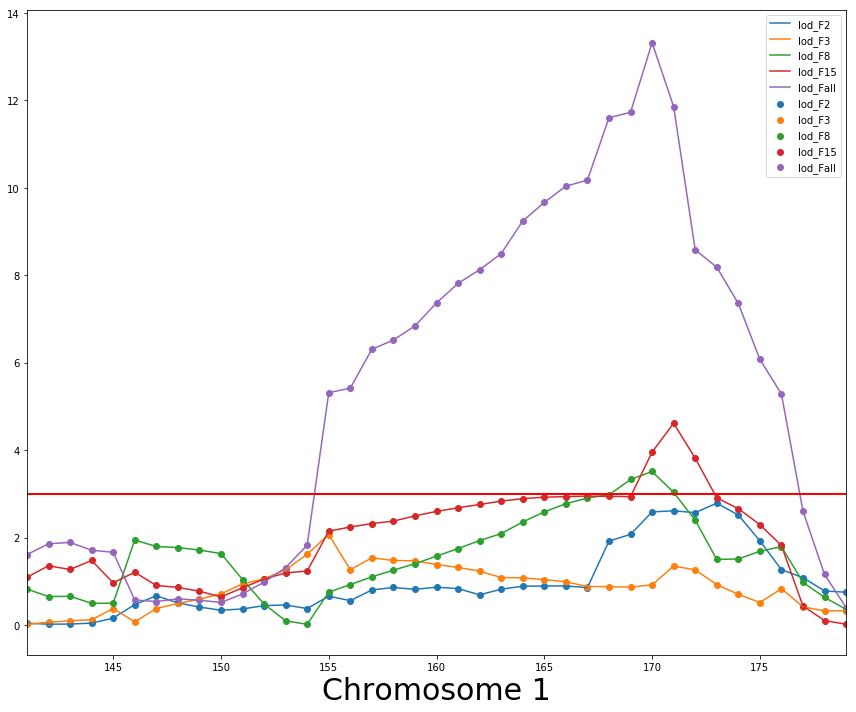

In [377]:
big_plot(input_df=tot, lod_thresh=3, scatter=True, chrom=1, interval=(140,180))

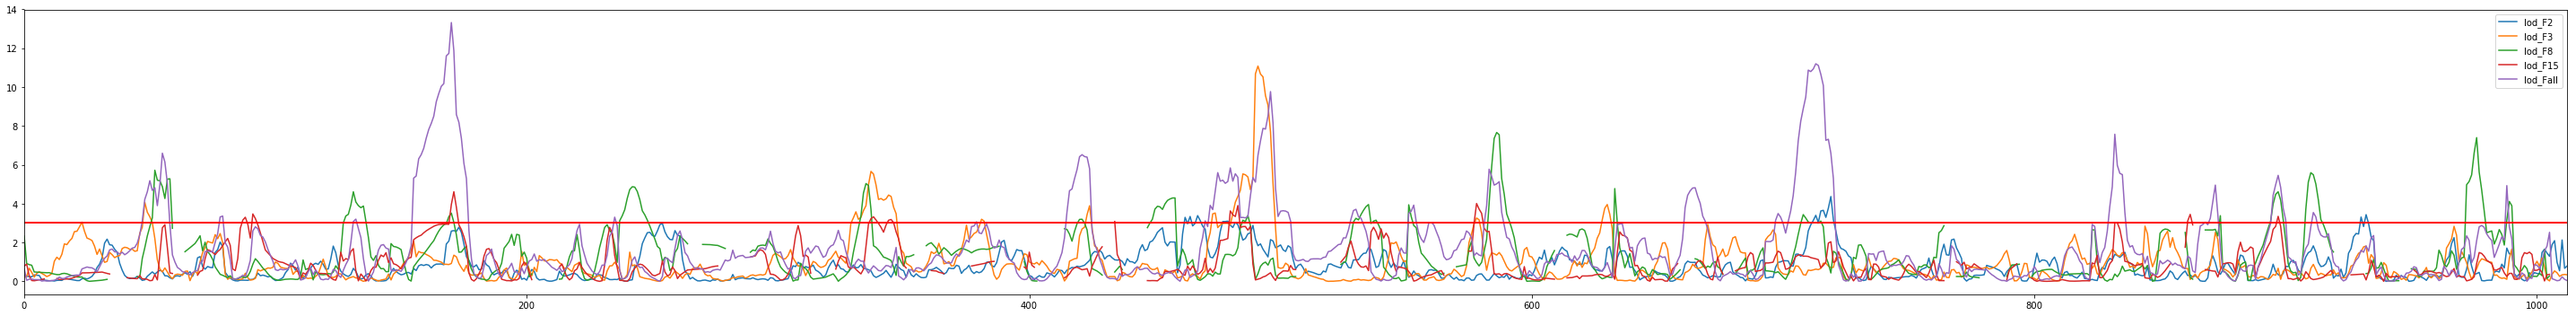

In [146]:
big_plot(input_df=tot, lod_thresh=3)

In [ ]:
    num_plots = len(set(df.chr))
    fig, axes = plt.subplots(ncols=1, nrows=num_plots, figsize=(20,2*num_plots))
    for i,k in enumerate(list(set(df.chr))):
        curr_df = df[df.chr==k]
        axes[i].plot(curr_df["pos"], curr_df["lod"], color="black")
        axes[i].set_xlim(0,max(curr_df["pos"]))
        axes[i].set_ylim(0,5)
        axes[i].axhline(3, color='red', lw=2)
        axes[i].set_xlabel("chromosome {}".format(k))
    plt.tight_layout()
    plt.savefig(filename)
    plt.show()


## load liftover from old files

In [210]:
old_f15 = pd.read_csv("./r_liftover/180828_QTL_F15_to_T.txt", sep="\t")

In [213]:
old_f15.columns = ["marker", "chr", "pos", "pval"]

In [214]:
liftover_f15 = pd.read_csv("r_liftover/new_positions_for_F15qtls.csv")

In [216]:
merge_f15 = liftover_f15.merge(old_f15, how="outer", on="marker")

In [226]:
a =copy.deepcopy (merge_f15[["chr","start", "pval"]])

In [227]:
a_chr1 = a.loc[a["chr"]==1]

In [228]:
mb = [i/1000000 for i in a["start"]]

In [229]:
a["mb_pos_f15_old"] = mb

In [232]:
mlogp = [-np.log(i) for i in a["pval"]]

In [233]:
a["mlogp"] =mlogp

In [235]:
#a

In [236]:
c1 = tot.loc[tot.chr=="1"]

In [246]:
b = a.loc[a.chr==1]

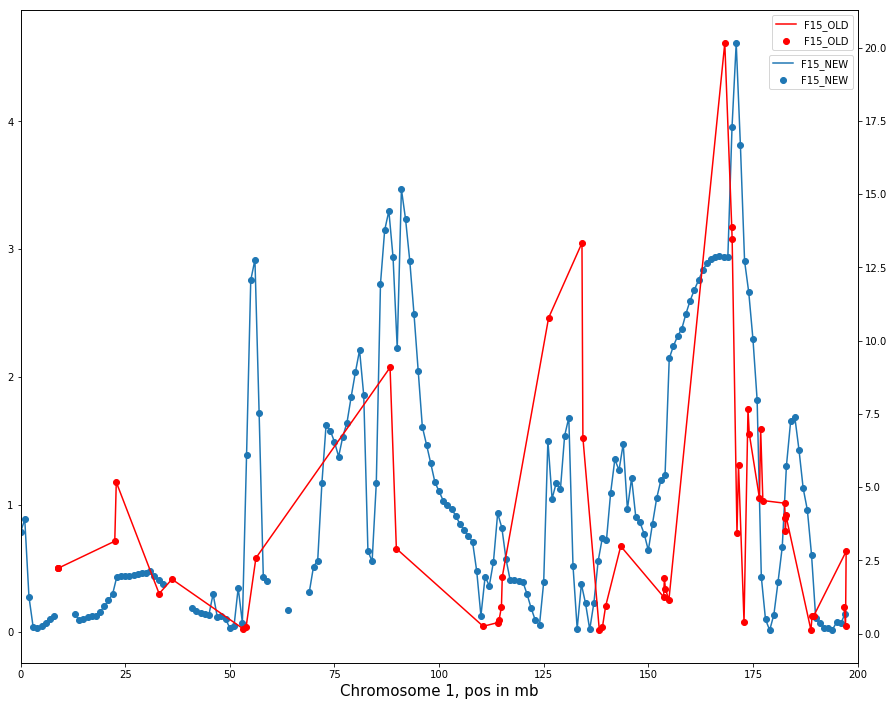

In [308]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(15,12))
ax.plot(list(c1.index), c1.lod_F15, label="F15_NEW")
ax.scatter(list(c1.index), c1.lod_F15, label="F15_NEW")

#ax.plot(list(c1.index), c1.lod_Fall, label="Fall_NEW")
#ax.scatter(list(c1.index), c1.lod_Fall, label="Fall_NEW")

ax.legend()
plt.legend(bbox_to_anchor = [1,0.94])
ax2 = ax.twinx()
ax2.plot(b.mb_pos_f15_old,b.mlogp, color="red", label="F15_OLD")
ax2.scatter(b.mb_pos_f15_old,b.mlogp, color="red", label="F15_OLD")

ax2.legend()
#ax.set_ylabel("LOD (NEW)", size=15)
ax.set_xlabel("Chromosome 1, pos in mb", size=15)
ax.set_xlim(0,200)
#ax2.set_xlabel("-log p-value (OLD)", size=15)
#plt.tight_layout()

plt.show()

In [309]:
#b